<a href="https://colab.research.google.com/github/annye/Greenhouses/blob/main/linear_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
!python3 --version
# Tensorboard in Colab environment.
!pip3 install tensorboardcolab
from tensorboardcolab import *
tbc = TensorBoardColab()

Python 3.7.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3859 sha256=5f8de539f7de2f41624e722729b521862f172b65b7420671492ffe25485cc2f6
  Stored in directory: /root/.cache/pip/wheels/69/4e/4a/1c6c267395cb10edded1050df12af165d3254cfce324e80941
Successfully built tensorboardcolab
Wait for 8 seconds...
TensorBoard link:
http://2fa1-35-204-75-137.ngrok.io


In [3]:
import sys
sys.path.insert(0,"/out22.csv")

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold, KFold # HalvingGridSearchCV

from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from numpy import asarray


%matplotlib inline
plt.style.use("ggplot")  #using style ggplot
import warnings
warnings.filterwarnings('ignore')


Read datasets

In [130]:
def get_data():
  ''' Read dataset'''
  df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zero/static/out22.csv')
  return df

def split_data():
  '''split into train and test sets'''
  df = get_data() 
  #Divide data into test and training
  y = df['CO2e']
  X = df
  X.drop(['CO2e'], axis=1, inplace=True)
  #Split data train and test"  
  X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.25, random_state = 42)
  print ("Train feature shape:", X_train.shape)
  print("Train feature shape:", X_test.shape)
  # converting train and test dataframes to matices to creat datasets
  X_train = X_train.astype('float32').values
  y_test = y_test.astype('float32').values

  return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data()


In [132]:
# converting train and test dataframes to matices to creat datasets
X_train = X_train.astype('float32').values
y_test = y_test.astype('float32').values
normalizer = keras.layers.Normalization()
normalizer.adapt(X_train)

In [134]:
# Training the Net

model = keras.models.Sequential()
model.add(keras.layers.Dense(units=1))
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=0.001),
    loss = "mean_absolute_error",
    metrics = [keras.metrics.RootMeanSquaredError()]
)
batch_size = 5
epochs =50
history = model.fit(x=X_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/50
186/186 [==============================] - 1s 2ms/step - loss: 104.5624 - root_mean_squared_error: 133.7266
Epoch 2/50
186/186 [==============================] - 0s 2ms/step - loss: 71.4093 - root_mean_squared_error: 92.7685
Epoch 3/50
186/186 [==============================] - 0s 2ms/step - loss: 71.0720 - root_mean_squared_error: 92.1459
Epoch 4/50
186/186 [==============================] - 0s 2ms/step - loss: 71.0892 - root_mean_squared_error: 91.8011
Epoch 5/50
186/186 [==============================] - 0s 2ms/step - loss: 70.9884 - root_mean_squared_error: 91.5761
Epoch 6/50
186/186 [==============================] - 0s 2ms/step - loss: 70.9266 - root_mean_squared_error: 91.3806
Epoch 7/50
186/186 [==============================] - 0s 2ms/step - loss: 70.7983 - root_mean_squared_error: 91.2778
Epoch 8/50
186/186 [==============================] - 0s 2ms/step - loss: 70.7028 - root_mean_squared_error: 91.1521
Epoch 9/50
186/186 [==============================] - 0s 2ms/s

In [135]:
trained_epochs = history.epoch
history_df = pd.DataFrame(history.history)
rmse = history_df["root_mean_squared_error"]

In [136]:
history_df.sample(10)

,loss,root_mean_squared_error
24,70.209122,90.495094
3,71.089249,91.801064
34,69.777206,90.259514
30,70.081619,90.200661
39,69.873795,90.219704
37,70.050385,90.239120
21,70.308617,90.625923
28,70.291626,90.740234
22,70.380325,90.553497
45,69.634743,89.809509


In [137]:
history_df.tail()

,loss,root_mean_squared_error
45,69.634743,89.809509
46,69.790077,90.056366
47,69.687828,89.792923
48,69.438370,89.733742
49,69.701408,89.970444


Text(0, 0.5, 'Root Mean Squared Error')

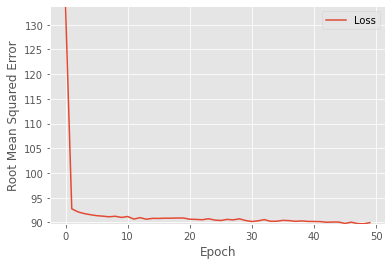

In [138]:
plt.plot(trained_epochs, rmse, label="Loss")
plt.legend()
plt.ylim([rmse.min(), rmse.max()])
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")

In [139]:
prediction = model.predict(X_test)

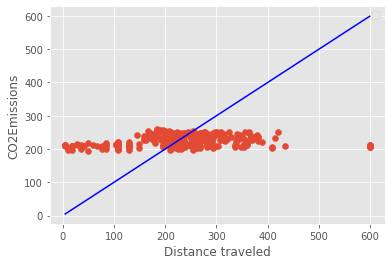

In [140]:
plt.scatter(y_test,prediction)
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Distance traveled')
plt.ylabel('CO2Emissions')
plt.legend()